## Number Of Streams Prediction Model for Top Songs 


In [1]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
songs_data = pd.read_csv("spotify-2023.csv" , encoding = 'latin-1')

# Displaying data description
songs_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [2]:
songs_data.key.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

### Cleaning And Preparation of Data

In [3]:
# We can observe 'key' has null values and we observe that only missing values is for the key is 'C' hence we fill them accordingly
songs_data['key'] = songs_data['key'].fillna('C')

# converting 'streams' from object to int64 and removing any null values thus induced
songs_data['streams'] = pd.to_numeric(songs_data['streams'],errors = 'coerce',downcast = 'integer')
songs_data = songs_data.dropna(subset = 'streams')
songs_data['streams'] = songs_data['streams'].astype('int64')

#converting 'in_deezer_playlists' from object to int64 after removing commas from numbers 
songs_data['in_deezer_playlists'] = songs_data['in_deezer_playlists'].str.replace(',','').astype('int64')

# 'in_shazam_charts' has null values so we drop those rows and then convert them to numbers 
songs_data = songs_data.dropna(subset = 'in_shazam_charts')
songs_data['in_shazam_charts'] = songs_data['in_shazam_charts'].str.replace(',','').astype('int64')

songs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            902 non-null    object
 1   artist(s)_name        902 non-null    object
 2   artist_count          902 non-null    int64 
 3   released_year         902 non-null    int64 
 4   released_month        902 non-null    int64 
 5   released_day          902 non-null    int64 
 6   in_spotify_playlists  902 non-null    int64 
 7   in_spotify_charts     902 non-null    int64 
 8   streams               902 non-null    int64 
 9   in_apple_playlists    902 non-null    int64 
 10  in_apple_charts       902 non-null    int64 
 11  in_deezer_playlists   902 non-null    int64 
 12  in_deezer_charts      902 non-null    int64 
 13  in_shazam_charts      902 non-null    int64 
 14  bpm                   902 non-null    int64 
 15  key                   902 non-null    ob

In [4]:
# we can see now each key has some non-null values
songs_data.key.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'C', 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

### Assigning Categorical variable Numerical Values

In [5]:
  
key_to_frequency = {
        'A': 0,
        'A#': 1,
        'B': 2,
        'C': 3,
        'C#': 4,
        'D': 5,
        'D#': 6,
        'E': 7,
        'F': 8,
        'F#': 9,
        'G': 10,
        'G#': 11
    }

# Replace the keys of the track in the 'key' column with numbers representing their order of frequencies
songs_data['key'] = songs_data['key'].map(key_to_frequency)


# Replace Major with 1 and minor with 0 in the mode column
songs_data['mode'] = songs_data['mode'].map({'Major': 1, 'Minor': 0})

In [6]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            902 non-null    object
 1   artist(s)_name        902 non-null    object
 2   artist_count          902 non-null    int64 
 3   released_year         902 non-null    int64 
 4   released_month        902 non-null    int64 
 5   released_day          902 non-null    int64 
 6   in_spotify_playlists  902 non-null    int64 
 7   in_spotify_charts     902 non-null    int64 
 8   streams               902 non-null    int64 
 9   in_apple_playlists    902 non-null    int64 
 10  in_apple_charts       902 non-null    int64 
 11  in_deezer_playlists   902 non-null    int64 
 12  in_deezer_charts      902 non-null    int64 
 13  in_shazam_charts      902 non-null    int64 
 14  bpm                   902 non-null    int64 
 15  key                   902 non-null    in

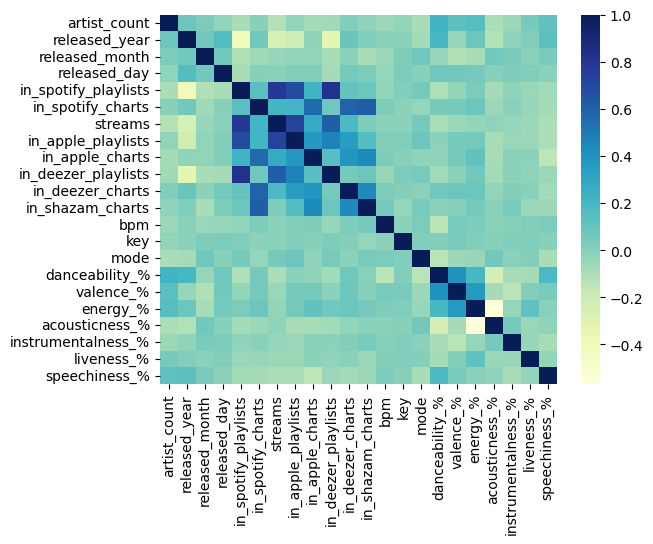

In [7]:
corr_data = songs_data.select_dtypes(exclude= ['object'])
heatmap = sns.heatmap(data = corr_data.corr(),cmap = "YlGnBu")
plt.show()

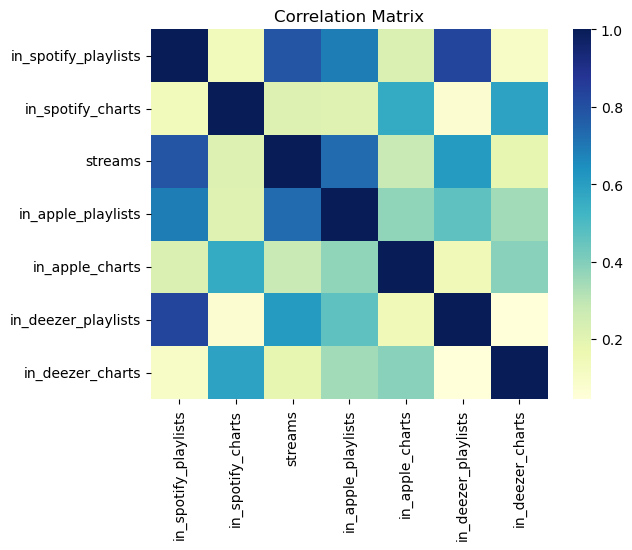

In [8]:
# Correlation matrix to understand relationships between more correlated related features

related_columns = [ 'in_spotify_playlists', 'in_spotify_charts', 'streams', 
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
correlation_matrix = songs_data[related_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

([<matplotlib.axis.YTick at 0x20c4fd33850>], [Text(0, 0.5, 'streams')])

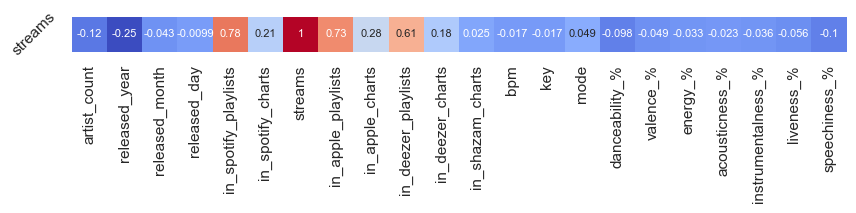

In [9]:
plt.figure(figsize=(10, 1))
sns.set(style="whitegrid")
sns.heatmap(corr_data.corr().iloc[6:7,:],annot=True,cmap="coolwarm", cbar=False, square=True,annot_kws={"size":8}),
plt.yticks(np.arange(0.5, 1.5), ['streams'],rotation = 45)

![Error](Histogram.png "Histogram")

![Error](Boxplot.png)

In [10]:
iqr = np.quantile(songs_data['streams'],0.75) - np.quantile(songs_data['streams'],0.25)
outlier_lower_bound = np.quantile(songs_data['streams'],0.75) + 1.5 * (iqr) # lower bound for all the outliers of number of streams as shown in the boxplot above
print("{:e}".format(outlier_lower_bound))

1.292015e+09


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge,RidgeCV

### Model On Complete Dataset of Number of Streams

In [12]:
songs_data_1 = songs_data

In [13]:
songs_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            902 non-null    object
 1   artist(s)_name        902 non-null    object
 2   artist_count          902 non-null    int64 
 3   released_year         902 non-null    int64 
 4   released_month        902 non-null    int64 
 5   released_day          902 non-null    int64 
 6   in_spotify_playlists  902 non-null    int64 
 7   in_spotify_charts     902 non-null    int64 
 8   streams               902 non-null    int64 
 9   in_apple_playlists    902 non-null    int64 
 10  in_apple_charts       902 non-null    int64 
 11  in_deezer_playlists   902 non-null    int64 
 12  in_deezer_charts      902 non-null    int64 
 13  in_shazam_charts      902 non-null    int64 
 14  bpm                   902 non-null    int64 
 15  key                   902 non-null    in

In [14]:
target_col = 'streams'
y =  songs_data_1[target_col]
X = songs_data_1.drop(columns=[target_col])
X = X.select_dtypes(exclude=['object'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          902 non-null    int64
 1   released_year         902 non-null    int64
 2   released_month        902 non-null    int64
 3   released_day          902 non-null    int64
 4   in_spotify_playlists  902 non-null    int64
 5   in_spotify_charts     902 non-null    int64
 6   in_apple_playlists    902 non-null    int64
 7   in_apple_charts       902 non-null    int64
 8   in_deezer_playlists   902 non-null    int64
 9   in_deezer_charts      902 non-null    int64
 10  in_shazam_charts      902 non-null    int64
 11  bpm                   902 non-null    int64
 12  key                   902 non-null    int64
 13  mode                  902 non-null    int64
 14  danceability_%        902 non-null    int64
 15  valence_%             902 non-null    int64
 16  energy_%

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

linear_regression_predictions = linear_regression_model.predict(X_test)


In [16]:
# linear_regression_predictions error
percentage_error = np.abs((y_test - linear_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - linear_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 
print("#### For Compete Data Using Linear Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Squared Error:",mean_squared_error(y_test,linear_regression_predictions))
print("R Squared Value:",r_squared)

#### For Compete Data Using Linear Regression Model ####
Mean Percentage Error: 107.86628018174174
Median Percentage Error: 36.853859917932674
Mean Squared Error: 7.926885939528784e+16
R Squared Value: 0.6965418749102985


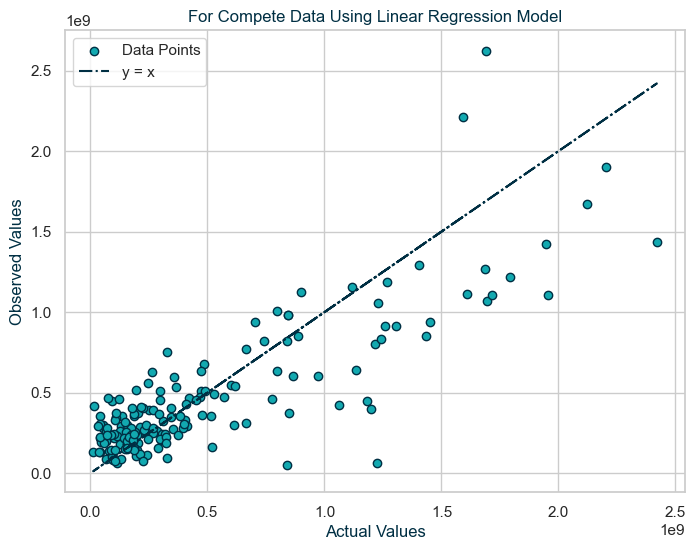

In [17]:
plt.figure(figsize=(8, 6))
cola = '#12a9b0'
colb = '#002f43'
plt.scatter(y_test,linear_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values',color = colb)
plt.ylabel('Observed Values',color = colb)
plt.title('For Compete Data Using Linear Regression Model',color = colb)

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Ridge Regression

In [18]:
# for ridge regression
cv = RepeatedKFold(n_splits = 10,n_repeats = 3,random_state =1)
ridge_regressor_model = RidgeCV(alphas = np.arange(0,1,0.01),cv = cv,scoring = 'neg_mean_absolute_error')

ridge_regressor_model.fit(X_train,y_train)
print('alpha: %f' % ridge_regressor_model.alpha_)


alpha: 0.990000


In [19]:
ridge_regression_predictions = ridge_regressor_model.predict(X_test)
# ridge_regression_predictions error
percentage_error = np.abs((y_test - ridge_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - ridge_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 

print("#### For Compete Data Using Ridge Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Square Error:",mean_squared_error(y_test,ridge_regression_predictions))
print("R Squared :",r_squared)

#### For Compete Data Using Ridge Regression Model ####
Mean Percentage Error: 107.8632860220992
Median Percentage Error: 36.87438246285351
Mean Square Error: 7.926543023722853e+16
R Squared : 0.696555002459796


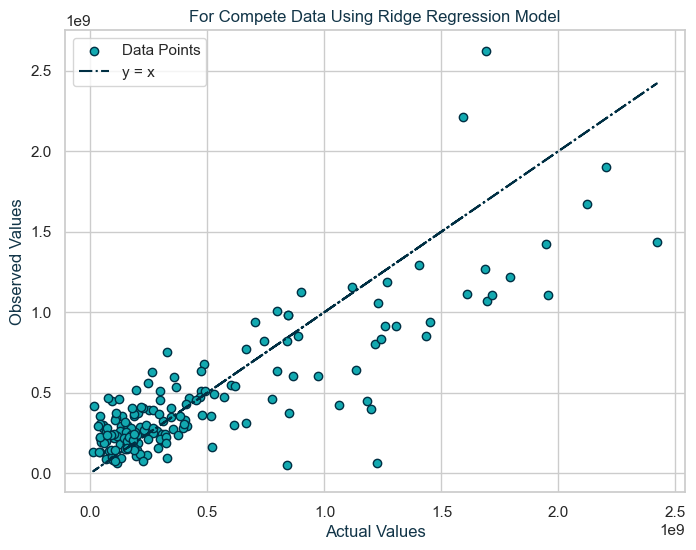

In [20]:
plt.figure(figsize=(8, 6))
cola = '#12a9b0'
colb = '#002f43'
plt.scatter(y_test,ridge_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')
colc = '#123548'

# Set plot labels and title
plt.xlabel('Actual Values',color = colc)
plt.ylabel('Observed Values',color = colc)
plt.title('For Compete Data Using Ridge Regression Model',color = colc )

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Model on Dataset of Number of Streams less than 1st Quartile

In [21]:
q3 = np.quantile(songs_data['streams'],0.75)
q1 = np.quantile(songs_data['streams'],0.25)
songs_data_2 = songs_data[(songs_data['streams'] <= q1) ]

In [22]:
songs_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 1 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            226 non-null    object
 1   artist(s)_name        226 non-null    object
 2   artist_count          226 non-null    int64 
 3   released_year         226 non-null    int64 
 4   released_month        226 non-null    int64 
 5   released_day          226 non-null    int64 
 6   in_spotify_playlists  226 non-null    int64 
 7   in_spotify_charts     226 non-null    int64 
 8   streams               226 non-null    int64 
 9   in_apple_playlists    226 non-null    int64 
 10  in_apple_charts       226 non-null    int64 
 11  in_deezer_playlists   226 non-null    int64 
 12  in_deezer_charts      226 non-null    int64 
 13  in_shazam_charts      226 non-null    int64 
 14  bpm                   226 non-null    int64 
 15  key                   226 non-null    in

In [23]:
target_col = 'streams'
y =  songs_data_2[target_col]
X = songs_data_2.drop(columns=[target_col])
X = X.select_dtypes(exclude=['object'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 1 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          226 non-null    int64
 1   released_year         226 non-null    int64
 2   released_month        226 non-null    int64
 3   released_day          226 non-null    int64
 4   in_spotify_playlists  226 non-null    int64
 5   in_spotify_charts     226 non-null    int64
 6   in_apple_playlists    226 non-null    int64
 7   in_apple_charts       226 non-null    int64
 8   in_deezer_playlists   226 non-null    int64
 9   in_deezer_charts      226 non-null    int64
 10  in_shazam_charts      226 non-null    int64
 11  bpm                   226 non-null    int64
 12  key                   226 non-null    int64
 13  mode                  226 non-null    int64
 14  danceability_%        226 non-null    int64
 15  valence_%             226 non-null    int64
 16  energy_%

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

linear_regression_predictions = linear_regression_model.predict(X_test)


In [25]:
# linear_regression_predictions error
percentage_error = np.abs((y_test - linear_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - linear_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 
print("#### For Data less than 25th percentile Using Linear Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Squared Error:",mean_squared_error(y_test,linear_regression_predictions))
print("R Squared Value:",r_squared)

#### For Data less than 25th percentile Using Linear Regression Model ####
Mean Percentage Error: 34.8272893090874
Median Percentage Error: 26.42908431483226
Mean Squared Error: 923228381048077.2
R Squared Value: 0.023658626025524154


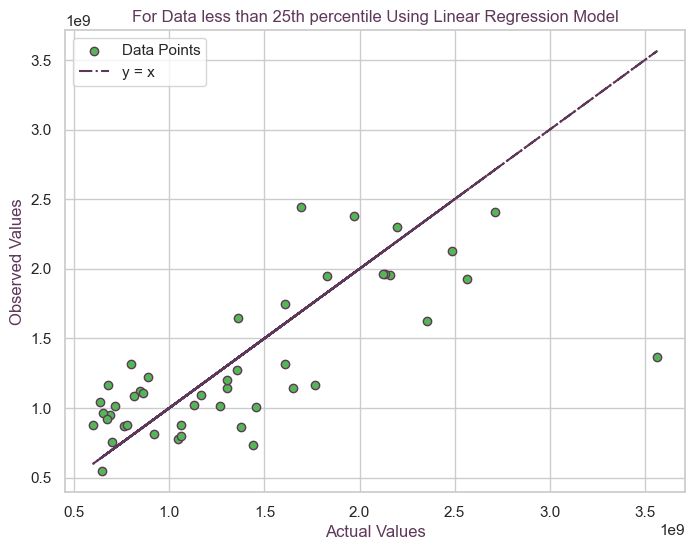

In [48]:
plt.figure(figsize=(8, 6))
cola = '#54b754'
colb = '#5e3859'
plt.scatter(y_test,linear_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values',color = colb)
plt.ylabel('Observed Values',color = colb)
plt.title('For Data less than 25th percentile Using Linear Regression Model',color = colb)

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Ridge Regression

In [27]:
# for ridge regression
cv = RepeatedKFold(n_splits = 10,n_repeats = 3,random_state =1)
ridge_regressor_model = RidgeCV(alphas = np.arange(0,1,0.01),cv = cv,scoring = 'neg_mean_absolute_error')

ridge_regressor_model.fit(X_train,y_train)
print('alpha: %f' % ridge_regressor_model.alpha_)


alpha: 0.990000


In [28]:
ridge_regression_predictions = ridge_regressor_model.predict(X_test)
# ridge_regression_predictions error
percentage_error = np.abs((y_test - ridge_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - ridge_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 

print("#### For Data less than 25th percentile Using Ridge Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Square Error:",mean_squared_error(y_test,ridge_regression_predictions))
print("R Squared :",r_squared)

#### For Data less than 25th percentile Using Ridge Regression Model ####
Mean Percentage Error: 34.83189414017767
Median Percentage Error: 26.476209849396817
Mean Square Error: 922633822548527.9
R Squared : 0.024287389259274872


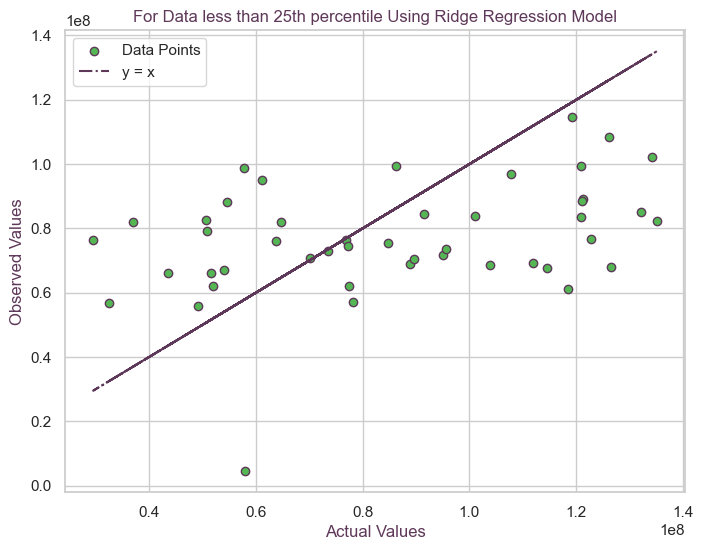

In [29]:
plt.figure(figsize=(8, 6))
cola = '#54b754'
colb = '#5e3859'
plt.scatter(y_test,ridge_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values',color = colb)
plt.ylabel('Observed Values',color = colb)
plt.title('For Data less than 25th percentile Using Ridge Regression Model',color = colb)

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Model on Dataset of Number of Streams greater than 1st Quartile and less than 3rd Quartile

In [30]:
q3 = np.quantile(songs_data['streams'],0.75)
q1 = np.quantile(songs_data['streams'],0.25)
songs_data_3 = songs_data[(songs_data['streams'] >= q1)  & (songs_data['streams'] <= q3)]

In [31]:
songs_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            450 non-null    object
 1   artist(s)_name        450 non-null    object
 2   artist_count          450 non-null    int64 
 3   released_year         450 non-null    int64 
 4   released_month        450 non-null    int64 
 5   released_day          450 non-null    int64 
 6   in_spotify_playlists  450 non-null    int64 
 7   in_spotify_charts     450 non-null    int64 
 8   streams               450 non-null    int64 
 9   in_apple_playlists    450 non-null    int64 
 10  in_apple_charts       450 non-null    int64 
 11  in_deezer_playlists   450 non-null    int64 
 12  in_deezer_charts      450 non-null    int64 
 13  in_shazam_charts      450 non-null    int64 
 14  bpm                   450 non-null    int64 
 15  key                   450 non-null    in

In [32]:
target_col = 'streams'
y =  songs_data_3[target_col]
X = songs_data_3.drop(columns=[target_col])
X = X.select_dtypes(exclude=['object'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 947
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          450 non-null    int64
 1   released_year         450 non-null    int64
 2   released_month        450 non-null    int64
 3   released_day          450 non-null    int64
 4   in_spotify_playlists  450 non-null    int64
 5   in_spotify_charts     450 non-null    int64
 6   in_apple_playlists    450 non-null    int64
 7   in_apple_charts       450 non-null    int64
 8   in_deezer_playlists   450 non-null    int64
 9   in_deezer_charts      450 non-null    int64
 10  in_shazam_charts      450 non-null    int64
 11  bpm                   450 non-null    int64
 12  key                   450 non-null    int64
 13  mode                  450 non-null    int64
 14  danceability_%        450 non-null    int64
 15  valence_%             450 non-null    int64
 16  energy_%

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

linear_regression_predictions = linear_regression_model.predict(X_test)


In [34]:
# linear_regression_predictions error
percentage_error = np.abs((y_test - linear_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - linear_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 
print("#### For Data >= 25th and <= 75th Percentile Using Linear Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Squared Error:",mean_squared_error(y_test,linear_regression_predictions))
print("R Squared Error:",r_squared)

#### For Data >= 25th and <= 75th Percentile Using Linear Regression Model ####
Mean Percentage Error: 30.86787169277575
Median Percentage Error: 24.11296198682426
Mean Squared Error: 9811353778474336.0
R Squared Error: 0.44921393737006365


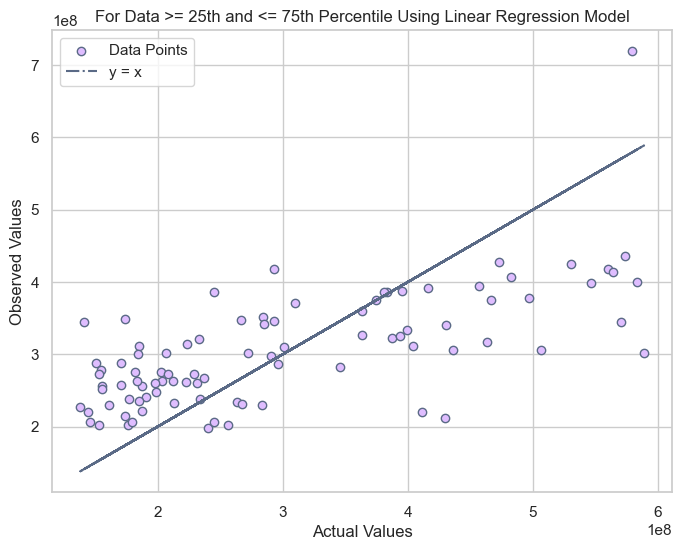

In [35]:
plt.figure(figsize=(8, 6))
cola = '#dfbdff'
colb = '#5a6a86'
plt.scatter(y_test,linear_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Observed Values')
plt.title('For Data >= 25th and <= 75th Percentile Using Linear Regression Model')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Ridge Regression

In [36]:
# for ridge regression
cv = RepeatedKFold(n_splits = 10,n_repeats = 3,random_state =1)
ridge_regressor_model = RidgeCV(alphas = np.arange(0,1,0.01),cv = cv,scoring = 'neg_mean_absolute_error')

ridge_regressor_model.fit(X_train,y_train)
print('alpha: %f' % ridge_regressor_model.alpha_)


alpha: 0.990000


In [37]:
ridge_regression_predictions = ridge_regressor_model.predict(X_test)
# ridge_regression_predictions error
percentage_error = np.abs((y_test - ridge_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - ridge_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 

print("#### For Data >= 25th and <= 75th Percentile Using Ridge Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Square Error:",mean_squared_error(y_test,ridge_regression_predictions))
print("R Squared Error:",r_squared)

#### For Data >= 25th and <= 75th Percentile Using Ridge Regression Model ####
Mean Percentage Error: 30.869180207731546
Median Percentage Error: 24.130144608611587
Mean Square Error: 9810199879233146.0
R Squared Error: 0.4492787145286574


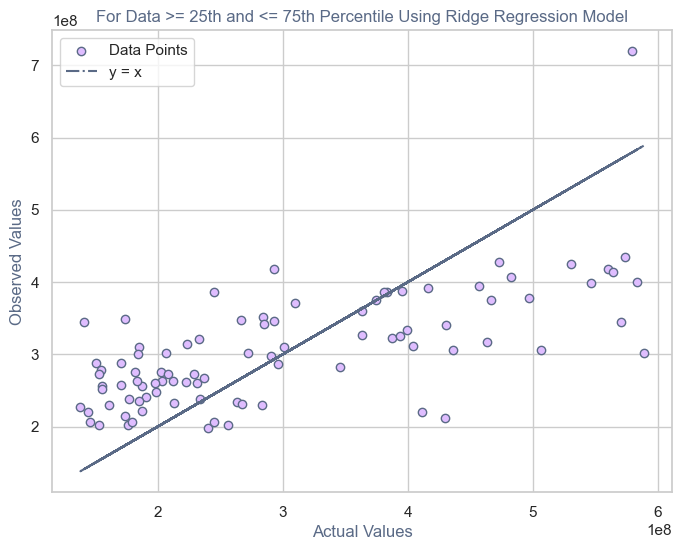

In [38]:
plt.figure(figsize=(8, 6))
cola = '#dfbdff'
colb = '#5a6a86'
plt.scatter(y_test,ridge_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values',color = colb)
plt.ylabel('Observed Values',color = colb)
plt.title('For Data >= 25th and <= 75th Percentile Using Ridge Regression Model',color = colb)

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Model on Dataset of Number of Streams greater than 3rd quartile

In [39]:
q3 = np.quantile(songs_data['streams'],0.75)
q1 = np.quantile(songs_data['streams'],0.25)
songs_data_4 = songs_data[ (songs_data['streams'] >= q3)]

In [40]:
songs_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 3 to 923
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            226 non-null    object
 1   artist(s)_name        226 non-null    object
 2   artist_count          226 non-null    int64 
 3   released_year         226 non-null    int64 
 4   released_month        226 non-null    int64 
 5   released_day          226 non-null    int64 
 6   in_spotify_playlists  226 non-null    int64 
 7   in_spotify_charts     226 non-null    int64 
 8   streams               226 non-null    int64 
 9   in_apple_playlists    226 non-null    int64 
 10  in_apple_charts       226 non-null    int64 
 11  in_deezer_playlists   226 non-null    int64 
 12  in_deezer_charts      226 non-null    int64 
 13  in_shazam_charts      226 non-null    int64 
 14  bpm                   226 non-null    int64 
 15  key                   226 non-null    in

In [41]:
target_col = 'streams'
y =  songs_data_4[target_col]
X = songs_data_4.drop(columns=[target_col])
X = X.select_dtypes(exclude=['object'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 3 to 923
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          226 non-null    int64
 1   released_year         226 non-null    int64
 2   released_month        226 non-null    int64
 3   released_day          226 non-null    int64
 4   in_spotify_playlists  226 non-null    int64
 5   in_spotify_charts     226 non-null    int64
 6   in_apple_playlists    226 non-null    int64
 7   in_apple_charts       226 non-null    int64
 8   in_deezer_playlists   226 non-null    int64
 9   in_deezer_charts      226 non-null    int64
 10  in_shazam_charts      226 non-null    int64
 11  bpm                   226 non-null    int64
 12  key                   226 non-null    int64
 13  mode                  226 non-null    int64
 14  danceability_%        226 non-null    int64
 15  valence_%             226 non-null    int64
 16  energy_%

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

linear_regression_predictions = linear_regression_model.predict(X_test)


In [43]:
# linear_regression_predictions error
percentage_error = np.abs((y_test - linear_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - linear_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 
print("#### For Data  greater than 75th Percentile Using Linear Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Squared Error:",mean_squared_error(y_test,linear_regression_predictions))
print("R Squared Error:",r_squared)

#### For Data  greater than 75th Percentile Using Linear Regression Model ####
Mean Percentage Error: 26.280817472644227
Median Percentage Error: 22.82128100859313
Mean Squared Error: 2.244036541280421e+17
R Squared Error: 0.5077036374809636


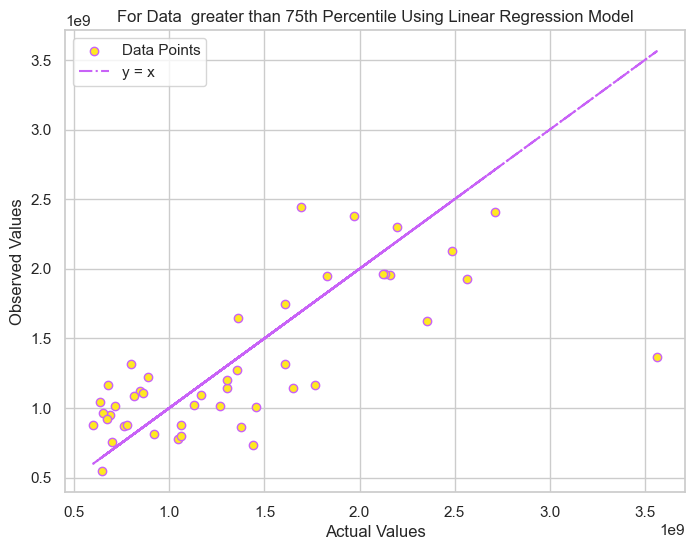

In [44]:
plt.figure(figsize=(8, 6))
cola = '#ffe921'
colb = '#c862f7' 
plt.scatter(y_test,linear_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Observed Values')
plt.title('For Data  greater than 75th Percentile Using Linear Regression Model')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Ridge Regression

In [45]:
# for ridge regression
cv = RepeatedKFold(n_splits = 10,n_repeats = 3,random_state =1)
ridge_regressor_model = RidgeCV(alphas = np.arange(0,1,0.01),cv = cv,scoring = 'neg_mean_absolute_error')

ridge_regressor_model.fit(X_train,y_train)
print('alpha: %f' % ridge_regressor_model.alpha_)


alpha: 0.990000


In [46]:
ridge_regression_predictions = ridge_regressor_model.predict(X_test)
# ridge_regression_predictions error
percentage_error = np.abs((y_test - ridge_regression_predictions) / y_test) * 100
percentage_error

mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
r_squared = 1 - (np.sum((y_test - ridge_regression_predictions)**2)/np.sum((y_test - np.mean(y_test))**2)) 

print("#### For Data  greater than 75th Percentile Using Ridge Regression Model ####")
print("Mean Percentage Error:", mean_percentage_error)
print("Median Percentage Error:", median_percentage_error)
print("Mean Square Error:",mean_squared_error(y_test,ridge_regression_predictions))
print("R Squared Error:",r_squared)

#### For Data  greater than 75th Percentile Using Ridge Regression Model ####
Mean Percentage Error: 26.28800256936435
Median Percentage Error: 22.78145913714145
Mean Square Error: 2.2431025643917418e+17
R Squared Error: 0.5079085331751805


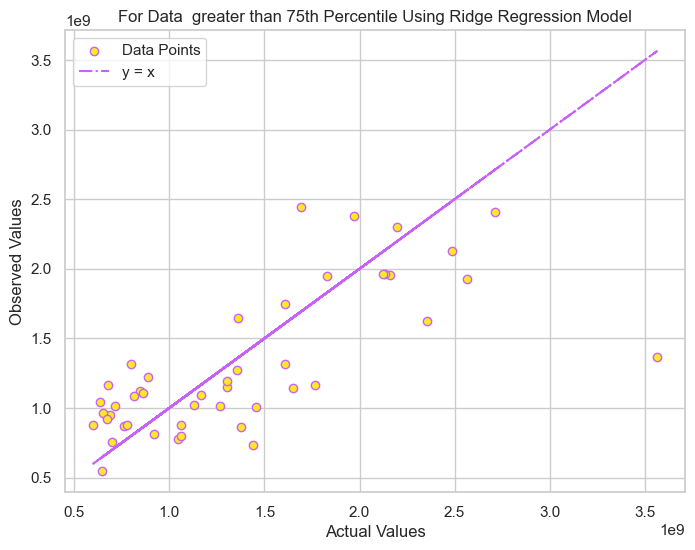

In [47]:
plt.figure(figsize=(8, 6))
cola = '#ffe921'
colb = '#c862f7' 
plt.scatter(y_test,ridge_regression_predictions, color=cola,edgecolors=colb, label='Data Points')
plt.plot(y_test, y_test, color=colb, linestyle='dashdot', label='y = x')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Observed Values')
plt.title('For Data  greater than 75th Percentile Using Ridge Regression Model')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()